In [3]:
import pandas as pd

# 创建一个示例数据框
data = {'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# 使用 where 方法进行多个条件筛选
filtered_data = df.where((df['A'] > 2) & (df['B'] < 40))

print(filtered_data)

     A     B
0  NaN   NaN
1  NaN   NaN
2  3.0  30.0
3  NaN   NaN
4  NaN   NaN


In [4]:
import pandas as pd

# 假设您的数据已经读入到名为 df 的 DataFrame 中
df = pd.DataFrame({
    'Date': ['2015-05-08', '2015-05-07', '2015-05-06', '2015-05-05', '2015-05-08', '2015-05-07', '2015-05-06', '2015-05-05'],
    'Sym': ['aapl', 'aapl', 'aapl', 'aapl', 'aaww', 'aaww', 'aaww', 'aaww'],
    'Data2': [11, 8, 10, 15, 110, 60, 100, 40],
    'Data3': [5, 8, 6, 1, 50, 100, 60, 120]
})

# 使用 transform 计算每个日期的 Data3 总和，并将其作为新列 Data4 添加到 DataFrame
df['Data4'] = df['Data3'].groupby(df['Date']).transform('sum')

# 打印结果
print(df)

         Date   Sym  Data2  Data3  Data4
0  2015-05-08  aapl     11      5     55
1  2015-05-07  aapl      8      8    108
2  2015-05-06  aapl     10      6     66
3  2015-05-05  aapl     15      1    121
4  2015-05-08  aaww    110     50     55
5  2015-05-07  aaww     60    100    108
6  2015-05-06  aaww    100     60     66
7  2015-05-05  aaww     40    120    121


<Axes: >

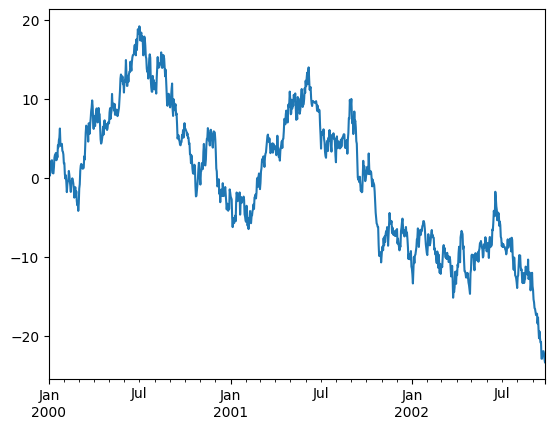

In [5]:
import pandas as pd
import numpy as np

# 创建一个示例的时间序列数据
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

# 绘制折线图
ts.plot()

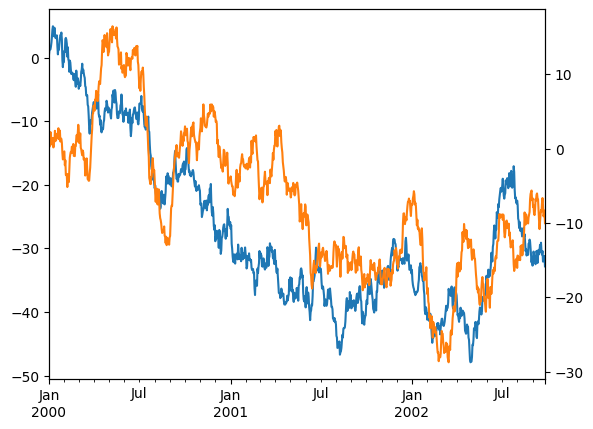

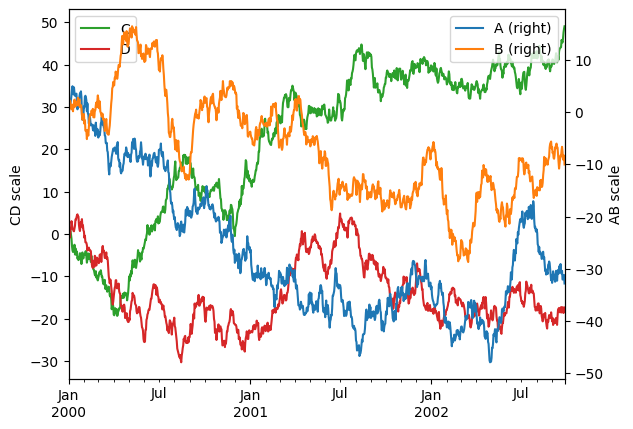

In [6]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()

# 图1：其中 A 列用左 Y 轴标注，B 列用右 Y 轴标注，二者共用一个 X 轴
df.A.plot()  # 对 A 列作图
df.B.plot(secondary_y=True)  # 设置第二个 Y 轴（右 Y 轴）

# 图2：定义 column A 和 B 使用右 Y 轴
ax = df.plot(secondary_y=["A", "B"])
ax.set_ylabel("CD scale")  # 主 Y 轴标签
ax.right_ax.set_ylabel("AB scale")  # 第二 Y 轴标签
ax.legend(loc="upper left")  # 设置图例的位置
ax.right_ax.legend(loc="upper right")  # 设置第二图例的位置

In [7]:
import pandas as pd

# 创建一个示例数据框
data = {'A': [1000, 2000, 3000, 4000, 5000]}
df = pd.DataFrame(data)

# 将列转化为货币格式
df['A'] = df['A'].map('${:,.2f}'.format)

print(df)


           A
0  $1,000.00
1  $2,000.00
2  $3,000.00
3  $4,000.00
4  $5,000.00


In [8]:
import pandas as pd

# 创建一个示例数据框
data = {'A': ['$5.00', '$15.00', '$20.00', '$8.00', '$12.00']}
df = pd.DataFrame(data)

# 将货币转化为数值
df['A'] = df['A'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# 筛选大于10美元的值
filtered_data = df[df['A'] > 10]

print(filtered_data)

      A
1  15.0
2  20.0
4  12.0


In [9]:
import pandas as pd
import numpy as np

# 创建一个示例时间序列数据
time_index = pd.date_range('2022-01-01', periods=100, freq='D')
data = np.random.randn(100)
ts = pd.Series(data, index=time_index)

# 使用 resample 方法将时间序列数据从每天转换为每月，并计算每月的平均值
monthly_avg = ts.resample('M').mean()

print(monthly_avg)

2022-01-31    0.261495
2022-02-28    0.200648
2022-03-31    0.177181
2022-04-30    0.307957
Freq: ME, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18048\1843459233.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = ts.resample('M').mean()


In [12]:
import pandas as pd

# 创建两个示例数据框
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# 使用 append 方法将 df2 的行附加到 df1 的末尾
# appended_df = df1.append(df2)
appended_df = df1._append(df2)

appended_df

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


## Long to Wide Reshape

In [1]:
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({
    'year': [2010, 2010, 2011, 2011],
    'city': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'population': [8175133, 3792621, 8491079, 3971883]
})

# reshape the DataFrame from long to wide format
df_wide = df.pivot(index='year', columns='city', values='population')

print(df_wide)

city  Los Angeles  New York
year                       
2010      3792621   8175133
2011      3971883   8491079


In [2]:
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({
    'year': [2010, 2010, 2011, 2011],
    'city': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'measure': ['population', 'population', 'area', 'area'],
    'value': [8175133, 3792621, 468.9, 1213.9]
})

# reshape the DataFrame from long to wide format
df_wide = df.pivot_table(index=['year', 'measure'], columns='city', values='value')

print(df_wide)

city             Los Angeles   New York
year measure                           
2010 population    3792621.0  8175133.0
2011 area             1213.9      468.9
